# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [1]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [3]:
!pip install nba_api

     |████████████████████████████████| 125 kB 2.2 MB/s eta 0:00:01
  Created wheel for nba-api: filename=nba_api-1.1.11-py3-none-any.whl size=251504 sha256=175ff8017efaa473ae69ee92def471450d18c06c34fe9f7e1e9ee08991186daf
  Stored in directory: /home/jeanette/.cache/pip/wheels/66/c2/3b/c87a243f9e5d2449e7f2c7bd65de4a6b5ce9a24b33978398a7
Successfully built nba-api


In [1]:
from nba_api.stats.endpoints import commonplayerinfo, commonallplayers, playercareerstats, playerprofilev2
import time
# import chardet
import math
import numpy as np
import pandas as pd
from unidecode import unidecode
import re
import seaborn as sns
from datetime import datetime, date
from dateutil.relativedelta import relativedelta

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
### Complete in this cell: get all active players from the api

def get_and_save_players_list():
    all_active_players = commonallplayers.CommonAllPlayers(is_only_current_season=1).common_all_players.get_data_frame()
    
    #Suggestions are removed from the slogan
    all_active_players = all_active_players[(all_active_players["TEAM_ID"] != 0) &
                                        (all_active_players["GAMES_PLAYED_FLAG"] != "N") & 
                                        (all_active_players["PERSON_ID"]!=1630597)]
    
    #The columns of interest are selected
    all_active_players = all_active_players[["PERSON_ID", "DISPLAY_FIRST_LAST", "TEAM_ID", "TEAM_NAME"]]

    #Index is defined
    all_active_players = all_active_players.set_index("PERSON_ID")
    all_active_players = all_active_players.sort_index(ascending=True)
    
    return all_active_players

In [6]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv")

2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [7]:
def personal_info_cleanse(player_active_info_c):

        #Selection of columns, rename and definition of the data type.
        player_active_info_c.rename(columns={"DISPLAY_FIRST_LAST":"PLAYER_NAME", "BIRTHDATE":"DATE_OF_BIRTH", "SEASON_EXP": "YEARS_OF_EXPERIENCE", "DRAFT_NUMBER":"DRAFT_POSITION", "COUNTRY":"COUNTRY_OF_ORIGIN"},index={"PERSON_ID":"PLAYER_ID"}, inplace=True)
        player_active_info_c = player_active_info_c[["PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY_OF_ORIGIN", "DATE_OF_BIRTH", "YEARS_OF_EXPERIENCE","DRAFT_POSITION"]]
        player_active_info_c["DRAFT_POSITION"] = player_active_info_c["DRAFT_POSITION"].fillna(0)
        player_active_info_c["DRAFT_POSITION"] = np.where(player_active_info_c["DRAFT_POSITION"]=="Undrafted", 0, player_active_info_c["DRAFT_POSITION"])
        player_active_info_c = player_active_info_c.astype({"PLAYER_NAME":"string", "TEAM_NAME": "string", "POSITION":"string", "COUNTRY_OF_ORIGIN":"string", "DRAFT_POSITION":"int64", "DATE_OF_BIRTH":"datetime64"})

        return player_active_info_c


def get_players_personal_information(current_players_list):
    player_active_info = pd.DataFrame()
    try:
        for player in list(current_players_list.index):
            player_info = commonplayerinfo.CommonPlayerInfo(player_id=player).common_player_info.get_data_frame()
            player_active_info =  pd.concat([player_active_info,player_info])
            time.sleep(0.5)
            
    except:
        print(f"TimeErrorOut in player: {player}")
        pass
    
    player_active_info = player_active_info.set_index("PERSON_ID")
    player_active_info = player_active_info.sort_index(ascending=True)
        
    player_active_info = personal_info_cleanse(player_active_info)
    
    return player_active_info

In [8]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("nba_players_personal_info.csv")

/tmp/ipykernel_18618/3812850050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_active_info_c["DRAFT_POSITION"] = player_active_info_c["DRAFT_POSITION"].fillna(0)
/tmp/ipykernel_18618/3812850050.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_active_info_c["DRAFT_POSITION"] = np.where(player_active_info_c["DRAFT_POSITION"]=="Undrafted", 0, player_active_info_c["DRAFT_POSITION"])


3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [9]:
### Complete in this cell: find players career stats, save to csv file

def get_players_career_stats(current_players_list):
    players_career_info = pd.DataFrame()
    try:
        for player in list(current_players_list.index):
            player_career = playercareerstats.PlayerCareerStats(player_id=player, per_mode36="PerGame").career_totals_regular_season.get_data_frame()
            players_career_info = pd.concat([players_career_info,player_career])
            time.sleep(0.5)
            
    except:
        print(f"TimeErrorOut in player: {player}")
        pass

    players_career_info = players_career_info.set_index("PLAYER_ID")
    players_career_info = players_career_info.sort_index(ascending=True)

    players_career_info = players_career_info[['GP','MIN','REB', 'AST', 'STL', 'BLK','PTS']]
                        
    return players_career_info

In [10]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("nba_players_career_stats.csv")

4- Create a function to find players next games and save the information to a csv call "nba_players_next_game.csv"

In [11]:
### Complete in this cell: find players next game

def get_players_next_game(current_players_list):
    players_nxgame = pd.DataFrame()
    player_career = pd.DataFrame()
    try:
        for player in list(current_players_list.index):
            player_career_nxgame = playerprofilev2.PlayerProfileV2(player_id=player, per_mode36="Totals").next_game.get_data_frame()
            player_career["GAME_DATE"] = player_career_nxgame["GAME_DATE"]
            player_career["PERSON_ID"] = player
            players_nxgame = pd.concat([players_nxgame, player_career])
            time.sleep(0.5)
            
    except:
        print(f"TimeErrorOut in player: {player}")
        pass

    players_nxgame = players_nxgame.set_index("PERSON_ID")
    players_nxgame = players_nxgame.sort_index(ascending=True)
    

    return players_nxgame

In [12]:
players_next_game = get_players_next_game(current_players_list)
players_next_game.to_csv("nba_players_next_game.csv")

5- Create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

Hint: Using data from the Basketball Reference page, you will have to solve 2 kinds of problems, duplicated values (for which you should keep just the first value) and players names not matching with the ones from the API. The latter problem has multiple causes, one of them is that some names are written with non ascii characters (there are libraries for dealing with that).

In [69]:
### Complete in this cell: find players salary, save the information to csv

def get_nba_players_salaries(csv_file_path):

    
    salaries = csv_file_path

#     salaries.columns = salaries.iloc[0]
    salaries = salaries.drop(['Rk'],axis=1)
    salaries=salaries[["Player", "2022-23"]]
#     salaries[["Player", "Residue"]] = salaries["Player"].str.split(' ', expand=True)
#     print(salaries)
#     salaries = salaries.drop("Residue", axis=1)
    salaries['Player'] = salaries['Player'].apply(lambda x: unidecode(x))
    salaries = salaries.drop_duplicates(subset=["Player"], keep='first')
    salaries = salaries[~salaries["2022-23"].isna()]
    salaries = salaries.reset_index()
    salaries = salaries.drop("index", axis=1)
    salaries['Player'] = salaries['Player'].apply(lambda x: str.lower(x.strip()))

    current_players_list['DISPLAY_FIRST_LAST'] = current_players_list['DISPLAY_FIRST_LAST'].apply(lambda x: str.lower(x.strip()))
    
    for j in range(0,len(salaries)):
        for i in current_players_list.index:
            if salaries.loc[j,"Player"] == current_players_list.loc[i,"DISPLAY_FIRST_LAST"]:
                salaries.loc[j,"PERSON_ID"] = i

    
    salaries = salaries.set_index("PERSON_ID")
    salaries = salaries.sort_index(ascending=True)
    salaries = salaries.rename(columns={"Player":"PLAYER_NAME", "2022-23":"SALARY"})
    return salaries

In [70]:
url = pd.read_csv('contracts.csv', header=1)

In [71]:
url.head()

,Rk,Player,Tm,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Guaranteed,-9999
0,1,Stephen Curry,GSW,$48070014,$51915615,$55761216,$59606817,NaN,NaN,$215353662,curryst01
1,2,Russell Westbrook,LAL,$47063478,NaN,NaN,NaN,NaN,NaN,$47063478,westbru01
2,3,LeBron James,LAL,$44474988,NaN,NaN,NaN,NaN,NaN,$44474988,jamesle01
3,4,Kevin Durant,BRK,$44119845,$47649433,$51179021,$54708609,NaN,NaN,$197656908,duranke01
4,5,Bradley Beal,WAS,$43279250,$46741590,$50203930,$53666270,$57128610,NaN,$193891040,bealbr01


In [72]:
players_salaries = get_nba_players_salaries(url)
players_salaries.to_csv("nba_players_salary.csv")

6- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [73]:
### Complete in this cell: merge the dataframes
def merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries):
    raw_players_dataset = players_personal_info.merge(players_career_stats, left_index=True, right_index=True, how="left")
    raw_players_dataset = raw_players_dataset.merge(players_next_game, left_index=True, right_index=True, how="left")
    raw_players_dataset = raw_players_dataset.merge(players_salaries[["SALARY"]], left_index=True, right_index=True, how="left")
    
    return raw_players_dataset

In [74]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")

## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [75]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary
def copy_and_delete_nan(players_dataset):
    new_dataset = players_dataset.copy()
    new_dataset = new_dataset[~new_dataset["SALARY"].isna()]
    new_dataset = new_dataset[~new_dataset["TEAM_NAME"].isna()]

    return new_dataset

In [76]:
working_df = copy_and_delete_nan(raw_players_dataset)

2- Cast Salary, Birthday and Game Date columns to its corresponding type (int, datetime) 

In [77]:
### Complete in this cell: cast all columns to its type
def cast_columns(working_df):
    
    working_df["SALARY"] = working_df["SALARY"].apply(lambda x: re.sub(r"[^a-zA-Z0-9]","",x))
    working_df['DATE_OF_BIRTH'] = working_df['DATE_OF_BIRTH'].astype('datetime64')
    working_df['GAME_DATE'] = working_df['GAME_DATE'].astype('datetime64')
    working_df['SALARY'] = working_df['SALARY'].astype('int')
    
    return working_df

3- Create a function that converts the height column from height in feet and inches to centimeters

In [78]:
cast_columns(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY_OF_ORIGIN,DATE_OF_BIRTH,YEARS_OF_EXPERIENCE,DRAFT_POSITION,GP,MIN,REB,AST,STL,BLK,PTS,GAME_DATE,SALARY
PERSON_ID,,,,,,,,,,,,,,,,,,
2544.0,LeBron James,Lakers,Forward,6-9,250,USA,1984-12-30,19,1,1366,38.2,7.5,7.4,1.6,0.8,27.1,2022-10-03,44474988
101108.0,Chris Paul,Suns,Guard,6-0,175,USA,1985-05-06,17,4,1155,34.5,4.5,9.5,2.1,0.1,18.1,2022-10-02,28400000
200752.0,Rudy Gay,Jazz,Forward-Guard,6-8,250,USA,1986-08-17,16,8,1064,31.7,5.8,2.1,1.1,0.7,16.3,2022-10-02,6184500
200768.0,Kyle Lowry,Heat,Guard,6-0,196,USA,1986-03-25,16,24,1023,31.9,4.4,6.3,1.3,0.3,14.8,2022-10-04,28333334
200782.0,P.J. Tucker,76ers,Forward,6-5,245,USA,1985-05-05,11,35,777,29.0,5.6,1.5,1.1,0.3,7.1,2022-10-03,10490000
201142.0,Kevin Durant,Nets,Forward,6-10,240,USA,1988-09-29,14,2,939,36.8,7.1,4.3,1.1,1.1,27.2,2022-10-03,44119845
201143.0,Al Horford,Celtics,Center-Forward,6-9,240,Dominican Republic,1986-06-03,15,3,950,32.2,8.2,3.3,0.8,1.2,13.7,2022-10-02,26500000
201144.0,Mike Conley,Jazz,Guard,6-1,175,USA,1987-10-11,15,4,958,32.0,3.0,5.6,1.4,0.2,14.8,2022-10-02,22680000
201145.0,Jeff Green,Nuggets,Forward,6-8,235,USA,1986-08-28,14,5,1051,29.0,4.3,1.5,0.7,0.5,12.6,2022-10-03,4500000


In [79]:
### Complete in this cell: convert height column
def convert_height_column(working_df):

    working_df["HEIGHT"] = (working_df["HEIGHT"].str.replace("-", ".")).astype("float64")
    working_df["HEIGHT"] = (working_df["HEIGHT"]*30.48).apply(lambda x: int(math.ceil(x)))

    return working_df

In [80]:
convert_height_column(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY_OF_ORIGIN,DATE_OF_BIRTH,YEARS_OF_EXPERIENCE,DRAFT_POSITION,GP,MIN,REB,AST,STL,BLK,PTS,GAME_DATE,SALARY
PERSON_ID,,,,,,,,,,,,,,,,,,
2544.0,LeBron James,Lakers,Forward,211,250,USA,1984-12-30,19,1,1366,38.2,7.5,7.4,1.6,0.8,27.1,2022-10-03,44474988
101108.0,Chris Paul,Suns,Guard,183,175,USA,1985-05-06,17,4,1155,34.5,4.5,9.5,2.1,0.1,18.1,2022-10-02,28400000
200752.0,Rudy Gay,Jazz,Forward-Guard,208,250,USA,1986-08-17,16,8,1064,31.7,5.8,2.1,1.1,0.7,16.3,2022-10-02,6184500
200768.0,Kyle Lowry,Heat,Guard,183,196,USA,1986-03-25,16,24,1023,31.9,4.4,6.3,1.3,0.3,14.8,2022-10-04,28333334
200782.0,P.J. Tucker,76ers,Forward,199,245,USA,1985-05-05,11,35,777,29.0,5.6,1.5,1.1,0.3,7.1,2022-10-03,10490000
201142.0,Kevin Durant,Nets,Forward,186,240,USA,1988-09-29,14,2,939,36.8,7.1,4.3,1.1,1.1,27.2,2022-10-03,44119845
201143.0,Al Horford,Celtics,Center-Forward,211,240,Dominican Republic,1986-06-03,15,3,950,32.2,8.2,3.3,0.8,1.2,13.7,2022-10-02,26500000
201144.0,Mike Conley,Jazz,Guard,186,175,USA,1987-10-11,15,4,958,32.0,3.0,5.6,1.4,0.2,14.8,2022-10-02,22680000
201145.0,Jeff Green,Nuggets,Forward,208,235,USA,1986-08-28,14,5,1051,29.0,4.3,1.5,0.7,0.5,12.6,2022-10-03,4500000


4- Create a function that converts the weight column from pounds to kilograms

In [81]:
### Complete in this cell: convert weight column
def convert_weight_column(working_df):

    working_df['WEIGHT'] = round(working_df['WEIGHT'].astype('float64') / 2.20462, 2)
    
    return working_df

In [82]:
convert_weight_column(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY_OF_ORIGIN,DATE_OF_BIRTH,YEARS_OF_EXPERIENCE,DRAFT_POSITION,GP,MIN,REB,AST,STL,BLK,PTS,GAME_DATE,SALARY
PERSON_ID,,,,,,,,,,,,,,,,,,
2544.0,LeBron James,Lakers,Forward,211,113.40,USA,1984-12-30,19,1,1366,38.2,7.5,7.4,1.6,0.8,27.1,2022-10-03,44474988
101108.0,Chris Paul,Suns,Guard,183,79.38,USA,1985-05-06,17,4,1155,34.5,4.5,9.5,2.1,0.1,18.1,2022-10-02,28400000
200752.0,Rudy Gay,Jazz,Forward-Guard,208,113.40,USA,1986-08-17,16,8,1064,31.7,5.8,2.1,1.1,0.7,16.3,2022-10-02,6184500
200768.0,Kyle Lowry,Heat,Guard,183,88.90,USA,1986-03-25,16,24,1023,31.9,4.4,6.3,1.3,0.3,14.8,2022-10-04,28333334
200782.0,P.J. Tucker,76ers,Forward,199,111.13,USA,1985-05-05,11,35,777,29.0,5.6,1.5,1.1,0.3,7.1,2022-10-03,10490000
201142.0,Kevin Durant,Nets,Forward,186,108.86,USA,1988-09-29,14,2,939,36.8,7.1,4.3,1.1,1.1,27.2,2022-10-03,44119845
201143.0,Al Horford,Celtics,Center-Forward,211,108.86,Dominican Republic,1986-06-03,15,3,950,32.2,8.2,3.3,0.8,1.2,13.7,2022-10-02,26500000
201144.0,Mike Conley,Jazz,Guard,186,79.38,USA,1987-10-11,15,4,958,32.0,3.0,5.6,1.4,0.2,14.8,2022-10-02,22680000
201145.0,Jeff Green,Nuggets,Forward,208,106.59,USA,1986-08-28,14,5,1051,29.0,4.3,1.5,0.7,0.5,12.6,2022-10-03,4500000


5- Create a function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

In [83]:
### Complete in this cell: add age column
def calculate_age(birthDate):
    try:
        age = relativedelta(datetime.now(), birthDate)
    
        return f"{age.years} años, {age.months} meses, {age.days} días"
    except:
        return 'S/D'

def add_age_column(working_df):
    
    working_df['AGE'] = working_df['DATE_OF_BIRTH'].apply(lambda x: calculate_age(x))

In [84]:
add_age_column(working_df)

6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [85]:
### Complete in this cell: disambiguation of the position column
def update_position(working_df):
  working_df['POSITION'] = working_df['POSITION'].str.split('-', expand=True).iloc[:,0]

  return working_df

In [86]:
update_position(working_df)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY_OF_ORIGIN,DATE_OF_BIRTH,YEARS_OF_EXPERIENCE,DRAFT_POSITION,GP,MIN,REB,AST,STL,BLK,PTS,GAME_DATE,SALARY,AGE
PERSON_ID,,,,,,,,,,,,,,,,,,,
2544.0,LeBron James,Lakers,Forward,211,113.40,USA,1984-12-30,19,1,1366,38.2,7.5,7.4,1.6,0.8,27.1,2022-10-03,44474988,"37 años, 8 meses, 18 días"
101108.0,Chris Paul,Suns,Guard,183,79.38,USA,1985-05-06,17,4,1155,34.5,4.5,9.5,2.1,0.1,18.1,2022-10-02,28400000,"37 años, 4 meses, 11 días"
200752.0,Rudy Gay,Jazz,Forward,208,113.40,USA,1986-08-17,16,8,1064,31.7,5.8,2.1,1.1,0.7,16.3,2022-10-02,6184500,"36 años, 1 meses, 0 días"
200768.0,Kyle Lowry,Heat,Guard,183,88.90,USA,1986-03-25,16,24,1023,31.9,4.4,6.3,1.3,0.3,14.8,2022-10-04,28333334,"36 años, 5 meses, 23 días"
200782.0,P.J. Tucker,76ers,Forward,199,111.13,USA,1985-05-05,11,35,777,29.0,5.6,1.5,1.1,0.3,7.1,2022-10-03,10490000,"37 años, 4 meses, 12 días"
201142.0,Kevin Durant,Nets,Forward,186,108.86,USA,1988-09-29,14,2,939,36.8,7.1,4.3,1.1,1.1,27.2,2022-10-03,44119845,"33 años, 11 meses, 19 días"
201143.0,Al Horford,Celtics,Center,211,108.86,Dominican Republic,1986-06-03,15,3,950,32.2,8.2,3.3,0.8,1.2,13.7,2022-10-02,26500000,"36 años, 3 meses, 14 días"
201144.0,Mike Conley,Jazz,Guard,186,79.38,USA,1987-10-11,15,4,958,32.0,3.0,5.6,1.4,0.2,14.8,2022-10-02,22680000,"34 años, 11 meses, 6 días"
201145.0,Jeff Green,Nuggets,Forward,208,106.59,USA,1986-08-28,14,5,1051,29.0,4.3,1.5,0.7,0.5,12.6,2022-10-03,4500000,"36 años, 0 meses, 20 días"


7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [87]:
working_df.to_csv("nba_players_processed_dataset.csv")

## Analyzing and Visualizing data

Now that we have the data, let's do some work

1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [88]:
### Complete in this cell: print general metrics
print(f"Total number of players: {len(working_df)}")
print(f"Number of USA born players: {len(working_df[working_df['COUNTRY_OF_ORIGIN'] == 'USA'])}")
print(f"Number of foreign playerss: {len(working_df[working_df['COUNTRY_OF_ORIGIN'] != 'USA'])}")
print(f"Number of players per position: {dict(working_df.groupby('POSITION').size())}")
print(f"Number of players per team: {dict(working_df.groupby('TEAM_NAME').size())}")
print(f"Number of rookies (first year players): {len(working_df[working_df['YEARS_OF_EXPERIENCE'] == 0])}")

Total number of players: 391
Number of USA born players: 294
Number of foreign playerss: 97
Number of players per position: {'Center': 54, 'Forward': 153, 'Guard': 184}
Number of players per team: {'76ers': 16, 'Bucks': 14, 'Bulls': 13, 'Cavaliers': 14, 'Celtics': 14, 'Clippers': 11, 'Grizzlies': 14, 'Hawks': 11, 'Heat': 12, 'Hornets': 12, 'Jazz': 13, 'Kings': 11, 'Knicks': 13, 'Lakers': 12, 'Magic': 13, 'Mavericks': 14, 'Nets': 10, 'Nuggets': 12, 'Pacers': 12, 'Pelicans': 13, 'Pistons': 14, 'Raptors': 16, 'Rockets': 16, 'Spurs': 12, 'Suns': 13, 'Thunder': 14, 'Timberwolves': 14, 'Trail Blazers': 13, 'Warriors': 11, 'Wizards': 14}
Number of rookies (first year players): 0


In [89]:
### Complete in this cell: print players descriptions
def calculate_age(birthDate):
    age = relativedelta(datetime.now(), birthDate)
    return int(age.years)
  
print(f"Average of ages: {np.average(list(working_df['DATE_OF_BIRTH'].apply(lambda x: calculate_age(x))))}")
print(f"Younges player age: {np.min(list(working_df['DATE_OF_BIRTH'].apply(lambda x: calculate_age(x))))}")
print(f"Oldest player age: {np.max(list(working_df['DATE_OF_BIRTH'].apply(lambda x: calculate_age(x))))}")
print(f"Min players height: {np.min(list(working_df['HEIGHT']))}")
print(f"Max players height: {np.max(list(working_df['HEIGHT']))}")
    

Average of ages: 26.199488491048594
Younges player age: 19
Oldest player age: 37
Min players height: 156
Max players height: 223


In [90]:
### Complete in this cell: Contracts
print(f"Minimun salary in the league: {np.min(working_df['SALARY'])}")
print(f"Maximum salary in the league: {np.max(working_df['SALARY'])}")
print(f"Mean salary in the league: {int(working_df['SALARY'].mean())}")
print(f"Median salary in the league: {int(working_df['SALARY'].median())}")

Minimun salary in the league: 50000
Maximum salary in the league: 48070014
Mean salary in the league: 10137274
Median salary in the league: 5739840


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

In [91]:
import seaborn as sns

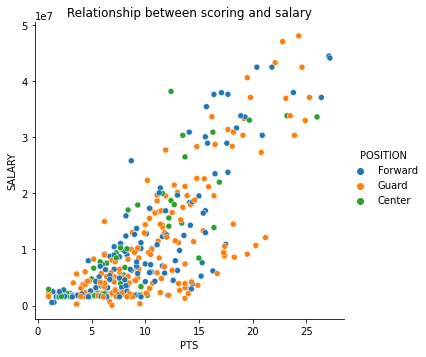

In [92]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)
sns.relplot(x='PTS', y='SALARY', data=working_df, hue='POSITION').set(title='Relationship between scoring and salary')

3- Now plot assists-vs-salary and rebounding-vs-salary

In [94]:
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'rebounding-vs-salary')]

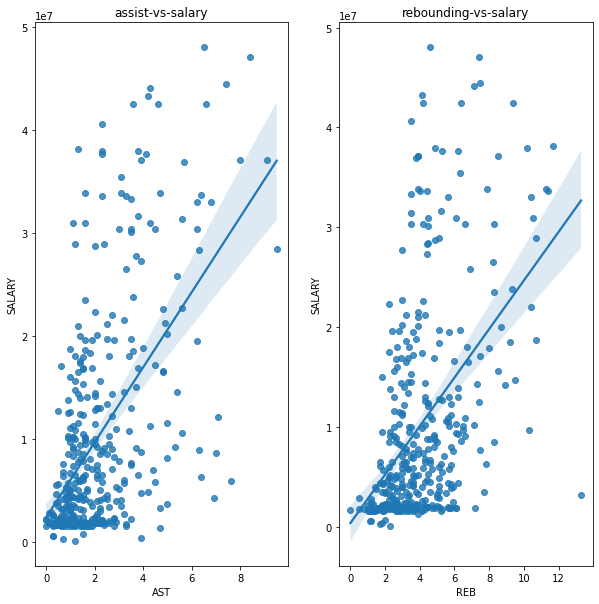

In [95]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary
rep1, axs = plt.subplots(ncols=2, figsize=(10,10))
sns.regplot(x='AST', y='SALARY', data=working_df, ax=axs[0]).set(title='assist-vs-salary')
sns.regplot(x='REB', y='SALARY', data=working_df, ax=axs[1]).set(title='rebounding-vs-salary')

4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

Text(0.5, 1.0, 'Salary-Rebounds')

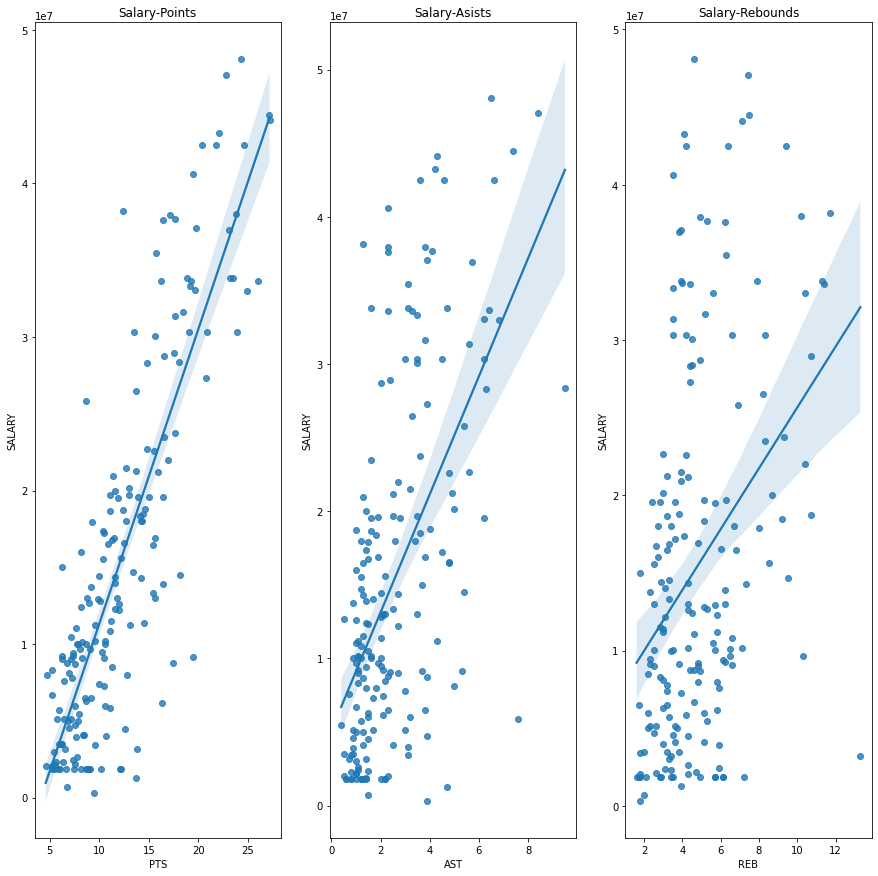

In [96]:
### Complete in this cell: non rookie contracts
player_plot = working_df[['AST','SALARY', 'YEARS_OF_EXPERIENCE','PTS','REB','POSITION']]
player_plot = player_plot[player_plot['YEARS_OF_EXPERIENCE']>4]
rep2, axs2 = plt.subplots(ncols=3, figsize=(15,15))
sns.regplot(x='PTS', y='SALARY', data=player_plot, ax=axs2[0]).set_title('Salary-Points')
sns.regplot(x='AST', y='SALARY', data=player_plot, ax=axs2[1]).set_title('Salary-Asists')
sns.regplot(x='REB', y='SALARY', data=player_plot, ax=axs2[2]).set_title('Salary-Rebounds')

5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

[Text(0.5, 1.0, 'Guard-Scoring-Average')]

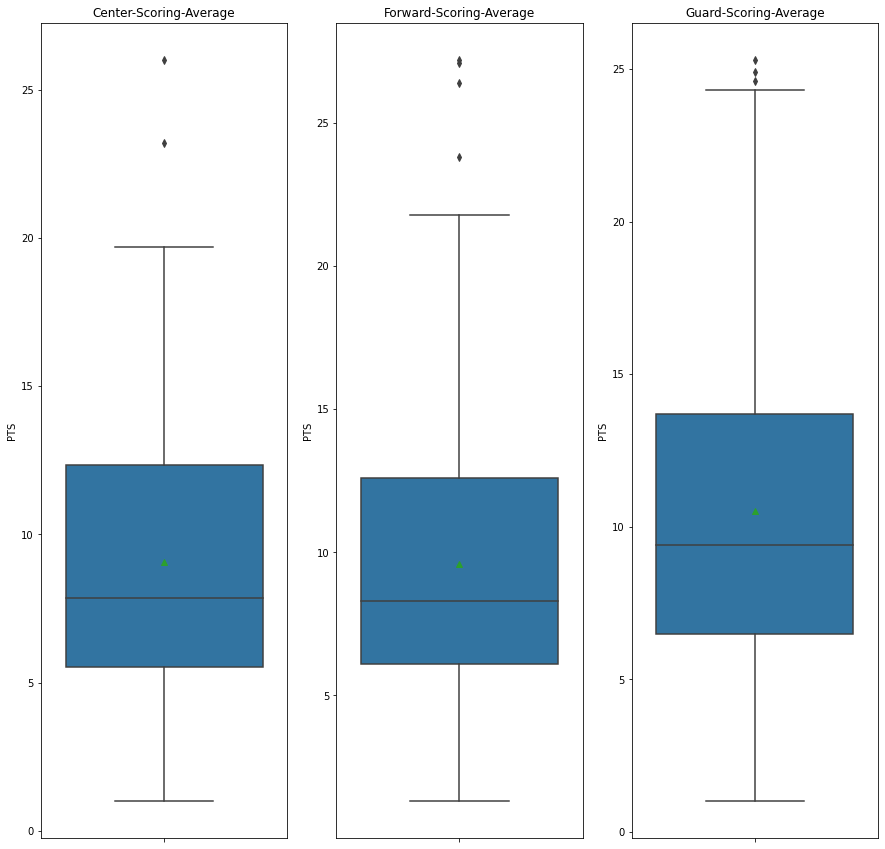

In [97]:
### Complete in this cell: Scoring average grouped by position
rep3, axs3 = plt.subplots(ncols=3, figsize=(15,15))
sns.boxplot(data= working_df[working_df['POSITION']=='Center'], y='PTS', ax=axs3[0], showmeans= True).set(title='Center-Scoring-Average')
sns.boxplot(data= working_df[working_df['POSITION']=='Forward'], y='PTS', ax=axs3[1], showmeans= True).set(title='Forward-Scoring-Average')
sns.boxplot(data= working_df[working_df['POSITION']=='Guard'], y='PTS', ax=axs3[2], showmeans= True).set(title='Guard-Scoring-Average')

6- Plot the Height distribution of all players

Text(0.5, 1.0, 'Height distribution of all players')

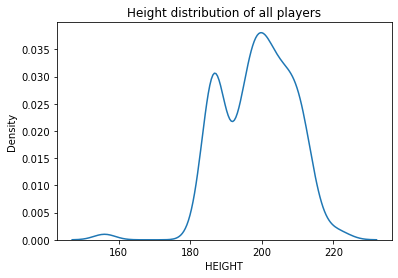

In [98]:
### Complete in this cell: height distribution
sns.kdeplot(data= working_df, x='HEIGHT').set_title('Height distribution of all players')

OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)

In [17]:
personal_info = pd.read_csv("nba_players_personal_info.csv")

In [18]:
personal_info.head()

,PERSON_ID,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY_OF_ORIGIN,DATE_OF_BIRTH,YEARS_OF_EXPERIENCE,DRAFT_POSITION
0,2544,LeBron James,Lakers,Forward,6-9,250,USA,1984-12-30,19,1
1,2546,Carmelo Anthony,Lakers,Forward,6-7,238,USA,1984-05-29,20,3
2,2617,Udonis Haslem,Heat,Forward,6-8,235,USA,1980-06-09,19,0
3,2730,Dwight Howard,Lakers,Center-Forward,6-10,265,USA,1985-12-08,19,1
4,2738,Andre Iguodala,Warriors,Guard-Forward,6-6,215,USA,1984-01-28,19,9


In [81]:
origin = pd.DataFrame(personal_info.groupby('COUNTRY_OF_ORIGIN').size().reset_index(name='Quantity'))

In [84]:
origin

,COUNTRY_OF_ORIGIN,Quantity
0,Angola,1
1,Argentina,2
2,Australia,6
3,Austria,1
4,Bahamas,3
5,Bosnia and Herzegovina,1
6,Brazil,2
7,Cameroon,2
8,Canada,20
9,Croatia,2


In [2]:
import geopandas as gpd

In [103]:
#Directory where the shapefile is located
shapefile = 'world/world.shp'
world_gdf = gpd.read_file(shapefile)
world_gdf

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
5,AO,AO,AGO,24,Angola,124670,16095214,2,17,17.544,-12.296,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
6,AQ,AS,ASM,16,American Samoa,20,64051,9,61,-170.730,-14.318,"MULTIPOLYGON (((-170.54251 -14.29750, -170.546..."
7,AR,AR,ARG,32,Argentina,273669,38747148,19,5,-65.167,-35.377,"MULTIPOLYGON (((-68.60861 -54.89140, -68.62056..."
8,AS,AU,AUS,36,Australia,768230,20310208,9,53,136.189,-24.973,"MULTIPOLYGON (((158.88217 -54.71139, 158.87967..."
9,BA,BH,BHR,48,Bahrain,71,724788,142,145,50.562,26.019,"MULTIPOLYGON (((50.81249 25.64222, 50.79250 25..."


<AxesSubplot:>

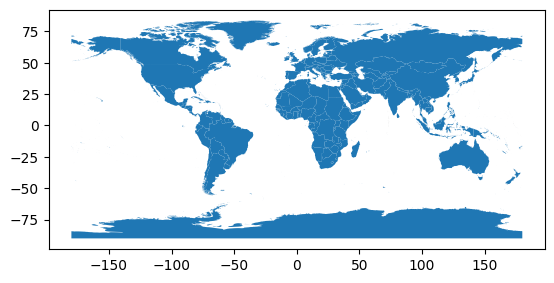

In [100]:
world_gdf.plot()

In [86]:
origin.at[39, 'COUNTRY_OF_ORIGIN'] = "United States"

In [104]:
world_gdf = world_gdf[["NAME", "geometry"]]

In [105]:
world_gdf

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
5,Angola,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
6,American Samoa,"MULTIPOLYGON (((-170.54251 -14.29750, -170.546..."
7,Argentina,"MULTIPOLYGON (((-68.60861 -54.89140, -68.62056..."
8,Australia,"MULTIPOLYGON (((158.88217 -54.71139, 158.87967..."
9,Bahrain,"MULTIPOLYGON (((50.81249 25.64222, 50.79250 25..."


In [110]:
world_gdf = world_gdf.merge(origin[["COUNTRY_OF_ORIGIN", "Quantity"]], left_on="NAME", right_on="COUNTRY_OF_ORIGIN", how="left")

In [111]:
world_gdf

,NAME,geometry,COUNTRY_OF_ORIGIN,Quantity
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",NaN,NaN
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",NaN,NaN
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",NaN,NaN
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",NaN,NaN
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",NaN,NaN
5,Angola,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -...",Angola,1.0
6,American Samoa,"MULTIPOLYGON (((-170.54251 -14.29750, -170.546...",NaN,NaN
7,Argentina,"MULTIPOLYGON (((-68.60861 -54.89140, -68.62056...",Argentina,2.0
8,Australia,"MULTIPOLYGON (((158.88217 -54.71139, 158.87967...",Australia,6.0
9,Bahrain,"MULTIPOLYGON (((50.81249 25.64222, 50.79250 25...",NaN,NaN


In [143]:
world_gdf = world_gdf[~world_gdf["Quantity"].isna()].reset_index()

<AxesSubplot:>

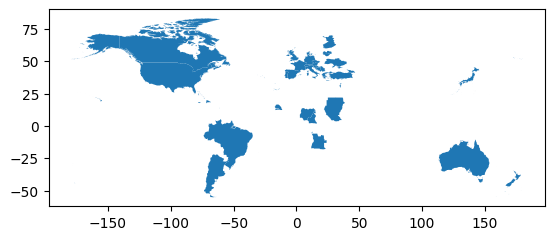

In [145]:
world_gdf.plot()

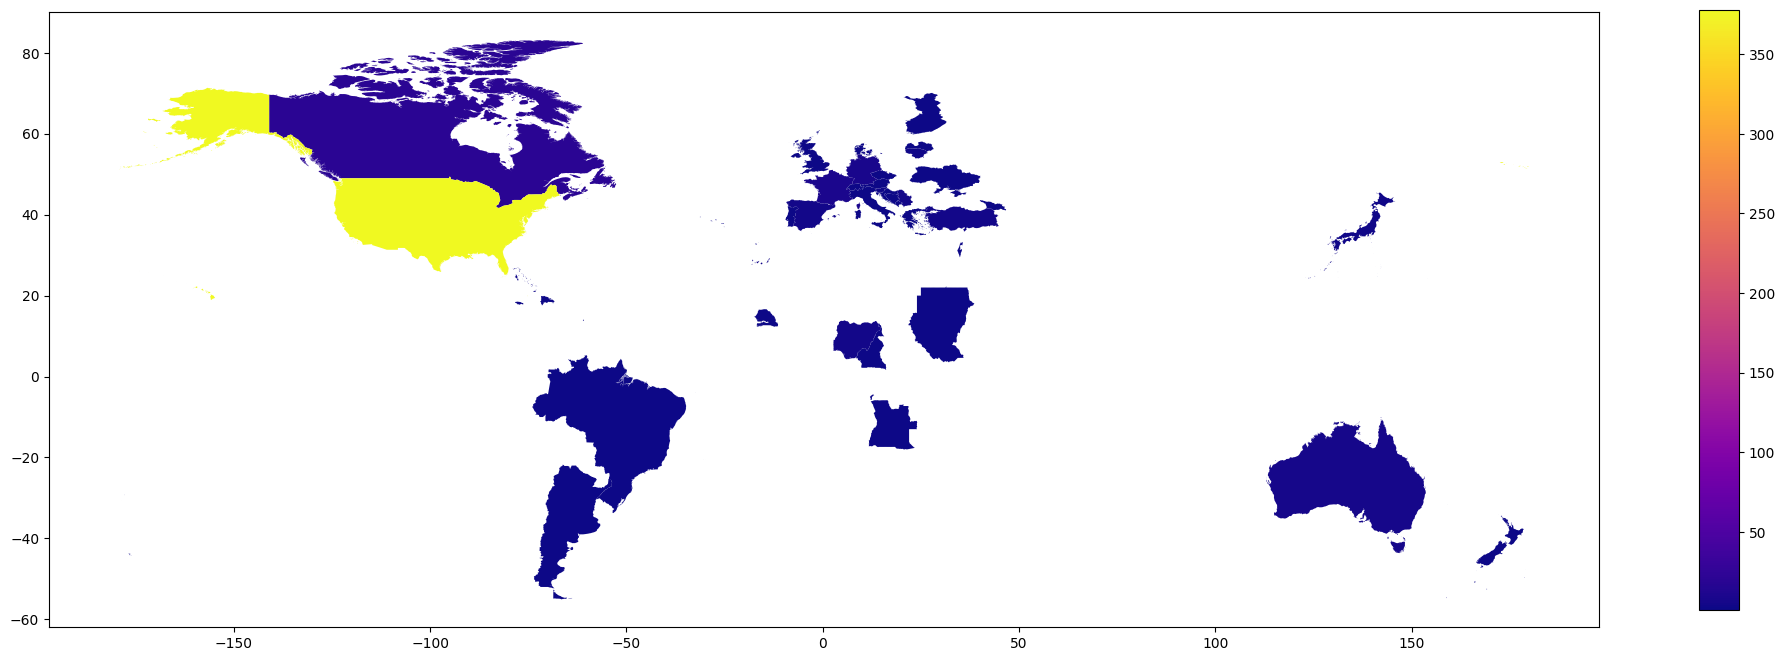

In [160]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
world_gdf.plot(column = 'Quantity', cmap = 'plasma', ax=ax)

min_p = min(world_gdf['Quantity'])
max_p = max(world_gdf['Quantity'])

bar = plt.cm.ScalarMappable(cmap = 'plasma', 
 norm=plt.Normalize(vmin = min_p , vmax=max_p))

bar._A = []
cax = plt.axes([0.95, 0.35, 0.02, 0.3])
cbar = fig.colorbar(bar, cax=cax)
